## Link of Dataset(CSV) and HDF5 file
- https://drive.google.com/file/d/1hrHn5ztWUO7ES-7oa206OyO78jNyoJEV/view?usp=sharing

## About this Dataset

### Description:
- This is a countrywide car accident dataset, which covers 49 states of the United States. 
- The accident data are collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. 
- Currently, there are about 3.0 million accident records in this dataset

### Inspiration:
- US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.



## About This Project
- In this project, we chose to work with US Accident dataset.
- We have taken the dataset from kaggle :  <a href="https://www.kaggle.com/sobhanmoosavi/us-accidents" target="blank">Data Source</a>
- Our main goal is to do an Exploratory Data Analysis and compare the performance of the following three tools:
<ol>
    <li>Pandas</li>
    <li>Vaex</li>
    <li>Spark</li>
</ol>
- While working on this project, we learned a couple of things...
<ol>
    <li>How to ask questions to ourselves and digging out the necessary information from the dataset</li>
    <li>How fast the memory-mapping of HDF5 file format is</li>
    <li>How to use Spark SQL as well as vaex for big data analysis</li>
</ol>


## File Path

In [1]:
usa_accident_file_path=r"D:\US_Accidents_Dec19.csv"
usa_accident_file_path_vaex=r'D:\US_Accidents_Dec19.hdf5'

## Imports and Installation

#### Installing plotly

In [2]:
import sys
!{sys.executable} -m pip install plotly

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import plotly.graph_objects as plt_go
import math
import vaex
import findspark
findspark.init()
import pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('project').getOrCreate()
reader = spark.read
reader.option("header","true")
reader.option("inferSchema","true")

## Reading data

#### Pandas

In [175]:
%%time
usa_accident_data=pd.read_csv(usa_accident_file_path)
usa_accident_data.head()

Wall time: 51.1 s


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [176]:
usa_accident_data.shape

(2974335, 49)

#### Vaex

In [177]:
%%time
usa_accident_data_vaex = vaex.open(usa_accident_file_path_vaex)
usa_accident_data_vaex

Wall time: 2.36 s


#,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance_mi_,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature_F_,Humidity___,Pressure_in_,Visibility_mi_,Wind_Direction,Wind_Speed_mph_,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Week_day,Week,Hour,road_affected_by_accident_hours
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,'Right lane blocked due to accident on I-70 East...,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,nan,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,6,5,6.0
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059000000005,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect delays.,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,100.0,29.65,10.0,Calm,nan,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,6,6,1.0
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,'Accident on OH-32 State Route 32 Westbound at D...,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,2016,2,0,6,6,1.0
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.20558199999999,0.01,'Accident on I-75 Southbound at Exits 52 52B US-...,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,6,7,1.0
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,'Accident on McEwen Rd at OH-725 Miamisburg Cent...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,2016,2,0,6,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2,974,330",A-2974354,Bing,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,0.5429999999999999,At Market St - Accident.,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,40.0,28.92,10.0,W,13.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,8,4,34,18,1.0
"2,974,331",A-2974355,Bing,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806000000002,0.33799999999999997,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,73.0,29.39,10.0,SW,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,8,4,34,19,1.0
"2,974,332",A-2974356,Bing,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84778999999999,0.561,'At Glassell St/Grand Ave - Accident. in the rig...,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,64.0,29.74,10.0,SSW,10.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,2019,8,4,34,19,1.0
"2,974,333",A-2974357,Bing,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992459999999994,-118.40302,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,81.0,29.62,10.0,SW,8.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,8,4,34,19,1.0


In [178]:
usa_accident_data_vaex.shape

(2974335, 46)

#### Spark

In [179]:
%%time
US_accident_data_spark = reader.csv(usa_accident_file_path)
US_accident_data_spark.show(5)

+---+--------+-----+--------+-------------------+-------------------+---------+----------+-------+-------+------------+--------------------+------+--------------------+----+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|  Source|  TMC|Severity|         Start_Time|           End_Time|Start_Lat| Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|Number|              Street|Side|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition

In [180]:
print((US_accident_data_spark.count(), len(US_accident_data_spark.columns)))

(2974335, 49)


### Analysis
- In comparison with two tools- spark and vaex, Pandas is too slow to read and display the data.
- To our surprise, vaex is tremendously fast in comparison to both spark and pandas.
- This is because displaying a Vaex DataFrame or column requires only the first and last 5 rows to be read from disk. 
- This leads us to another important point: Vaex will only go over the entire dataset when it has to, and it will try to do it with as few passes over the data as possible.

## Data Preprocessing in Pandas

### After analyzing the dataset, we found some of the columns such as Civil_Twilight, Nautical_Twilight and Astronomical_Twilight irrelevent for our analysis. So, we decided to drop these columns.

#### pandas

In [181]:
%%time
usa_accident_data_filtered=usa_accident_data.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
usa_accident_data_filtered.head()

Wall time: 1.32 s


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Day


In [182]:
len(usa_accident_data_filtered.columns)

46

### Let's see how many columns have missing values 

In [183]:
%%time
columns_null_values_count=usa_accident_data_filtered.isnull().sum(axis = 0)
columns_null_values_count  

Wall time: 3.11 s


ID                         0
Source                     0
TMC                   728071
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              2246264
End_Lng              2246264
Distance(mi)               0
Description                1
Number               1917605
Street                     0
Side                       0
City                      83
County                     0
State                      0
Zipcode                  880
Country                    0
Timezone                3163
Airport_Code            5691
Weather_Timestamp      36705
Temperature(F)         56063
Wind_Chill(F)        1852623
Humidity(%)            59173
Pressure(in)           48142
Visibility(mi)         65691
Wind_Direction         45101
Wind_Speed(mph)       440840
Precipitation(in)    1998358
Weather_Condition      65932
Amenity                    0
Bump                       0
Crossing      

### We can see from the above table that there are total six columns that have more than 500000 missing values. So we decided to drop those columns.

In [184]:
%%time
for column in usa_accident_data_filtered.columns:
    if columns_null_values_count[column]>500000:
        usa_accident_data_filtered=usa_accident_data_filtered.drop([column],axis=1)

Wall time: 7.39 s


In [185]:
usa_accident_data_filtered.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,False,False,False,True,False,Day


### Fetching Year, Month and Week Day from Start time of accident

In [186]:
%%time
usa_accident_data_filtered['Year']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).year
usa_accident_data_filtered['Month']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).month
usa_accident_data_filtered['Week_day']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).dayofweek
usa_accident_data_filtered['Week']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).week
usa_accident_data_filtered['Hour']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).hour

Wall time: 15.1 s


In [187]:
usa_accident_data_filtered.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Week_day,Week,Hour
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,Night,2016,2,0,6,5
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,Night,2016,2,0,6,6
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,True,False,Night,2016,2,0,6,6
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,Night,2016,2,0,6,7
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,True,False,Day,2016,2,0,6,7


## Here, We have done the same steps for Data Preprocessing in spark just to measure the performance

In [188]:
%%time
columns_to_drop = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
US_accident_data_spark = US_accident_data_spark.drop(*columns_to_drop)

Wall time: 44.9 ms


In [189]:
%%time
col_names = US_accident_data_spark.schema.names
null_values_each_col = {}
for name in col_names:
    null_values_each_col[name] = US_accident_data_spark.where(US_accident_data_spark[name].isNull()).select(name).count()
null_values_each_col

Wall time: 4min 42s


{'ID': 0,
 'Source': 0,
 'TMC': 728071,
 'Severity': 0,
 'Start_Time': 0,
 'End_Time': 0,
 'Start_Lat': 0,
 'Start_Lng': 0,
 'End_Lat': 2246264,
 'End_Lng': 2246264,
 'Distance(mi)': 0,
 'Description': 1,
 'Number': 1917605,
 'Street': 0,
 'Side': 0,
 'City': 83,
 'County': 0,
 'State': 0,
 'Zipcode': 880,
 'Country': 0,
 'Timezone': 3163,
 'Airport_Code': 5691,
 'Weather_Timestamp': 36705,
 'Temperature(F)': 56063,
 'Wind_Chill(F)': 1852623,
 'Humidity(%)': 59173,
 'Pressure(in)': 48142,
 'Visibility(mi)': 65691,
 'Wind_Direction': 45101,
 'Wind_Speed(mph)': 440840,
 'Precipitation(in)': 1998358,
 'Weather_Condition': 65932,
 'Amenity': 0,
 'Bump': 0,
 'Crossing': 0,
 'Give_Way': 0,
 'Junction': 0,
 'No_Exit': 0,
 'Railway': 0,
 'Roundabout': 0,
 'Station': 0,
 'Stop': 0,
 'Traffic_Calming': 0,
 'Traffic_Signal': 0,
 'Turning_Loop': 0,
 'Sunrise_Sunset': 93}

In [190]:
%%time
cols_more_than_500000_missing_values = []
for i in null_values_each_col:
    if null_values_each_col[i] > 500000:
        cols_more_than_500000_missing_values.append(i)
        
US_accident_data_spark = US_accident_data_spark.drop(*cols_more_than_500000_missing_values)


Wall time: 15 ms


In [191]:
print("Dataframe has",len(US_accident_data_spark.columns),"no of columns after drop operation")

Dataframe has 40 no of columns after drop operation


In [192]:
%%time

from pyspark.sql.functions import month, year, hour, weekofyear, dayofweek
US_accident_data_spark = US_accident_data_spark.withColumn('Month',month(US_accident_data_spark.Start_Time))
US_accident_data_spark = US_accident_data_spark.withColumn('Year',year(US_accident_data_spark.Start_Time))
US_accident_data_spark = US_accident_data_spark.withColumn('Hour',hour(US_accident_data_spark.Start_Time))
US_accident_data_spark = US_accident_data_spark.withColumn('Week_of_Year',weekofyear(US_accident_data_spark.Start_Time))
US_accident_data_spark = US_accident_data_spark.withColumn('Day_of_week',dayofweek(US_accident_data_spark.Start_Time))



Wall time: 323 ms


In [193]:
len(US_accident_data_spark.columns)

45

### Creating a table for querying with spark SQL

In [194]:
US_accident_data_spark.createOrReplaceTempView("US_accidents")

## As we have generated hdf5 file from the filtered pandas dataframe, we don't need to perform Data Preprossesing for VAEX

# General Functions For Analysis

#### Pandas

In [195]:
def column_group_count(df,column):
    new_df=pd.DataFrame(df.groupby(column).size()).reset_index()
    new_df.columns=[column,'Number_of_accidents']
    return new_df

def accidents_per_severity(df,severity,feature):
    severity_df=df[df['Severity']==severity]
    return column_group_count(severity_df,feature)

def bar_plot_by_severity(df,feature,subplot,severity,rotation):
    subplot.set_title("Accidents Per "+ feature + " of Severity "+ str(severity) )
    subplot.set_xlabel(feature)
    subplot.set_ylabel("Accident Count")
    subplot.tick_params('x',labelrotation=rotation)
    subplot.bar(df[feature],df['Number_of_accidents'])

#### Vaex

In [196]:
def column_group_count_vaex(df,column):
    new_df=df[column].value_counts()
    return new_df

def accidents_per_severity_vaex(df,severity,feature):
    severity_df=df[df['Severity']==severity]
    return column_group_count_vaex(severity_df,feature)

# Analysis

## From where the data came?

#### Pandas

In [197]:
%%time
data_source_df=column_group_count(usa_accident_data_filtered,'Source')
data_source_df

Wall time: 1.23 s


,Source,Number_of_accidents
0,Bing,728071
1,MapQuest,2204098
2,MapQuest-Bing,42166


#### Vaex

In [198]:
%%time
data_source_df_vaex=column_group_count_vaex(usa_accident_data_vaex,'Source')
data_source_df_vaex

Wall time: 1.49 s


MapQuest         2204098
Bing              728071
MapQuest-Bing      42166
dtype: int64

#### Spark

In [199]:
%%time
data_source_df_spark = spark.sql("""
    SELECT Source, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY Source
    ORDER BY Number_Of_Accidents DESC
    """)
data_source_df_spark.show()

+-------------+-------------------+
|       Source|Number_Of_Accidents|
+-------------+-------------------+
|     MapQuest|            2204098|
|         Bing|             728071|
|MapQuest-Bing|              42166|
+-------------+-------------------+

Wall time: 7.98 s


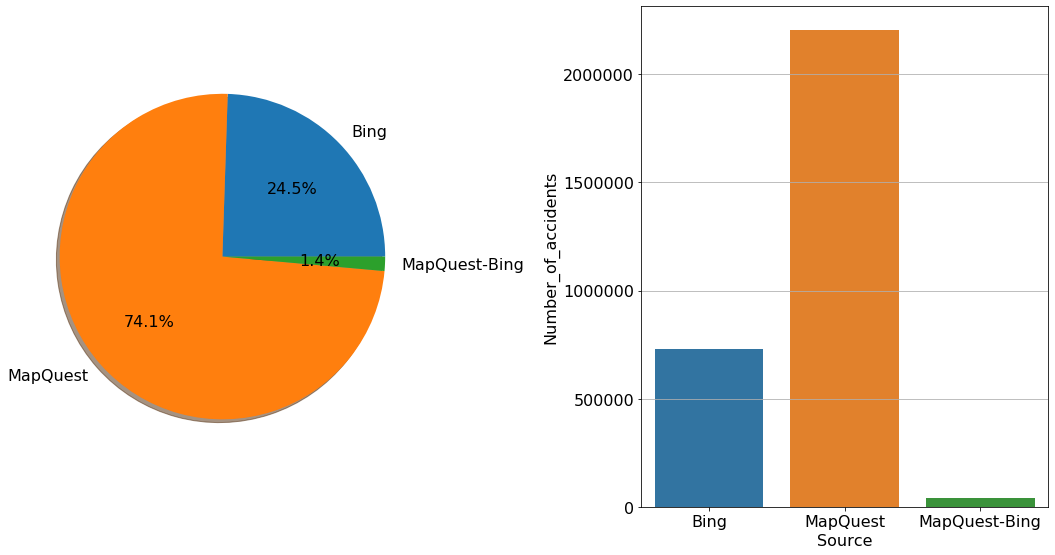

In [200]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.pie(data_source_df['Number_of_accidents'],labels= ['Bing','MapQuest','MapQuest-Bing'],autopct = ('%1.1f%%'),shadow=True)
ax2.set_xlabel('Type of source')
ax2.set_ylabel('Number of Accidents')
ax2.grid()
sns.barplot(data_source_df['Source'],data_source_df['Number_of_accidents'])
plt.tight_layout()
plt.show()

### Analysis
- Here, as we can see, around 74% data came from the MapQuest API. The the rest of the data came from the Bing API(24.5%) and MapQuest-Bing(1.4%) APIs.

## How many accidents occur by each severity?

#### Pandas

In [201]:
%%time
severity_df=column_group_count(usa_accident_data_filtered,'Severity')
severity_df = severity_df.sort_values(ascending=False,by='Number_of_accidents')
severity_df

Wall time: 131 ms


,Severity,Number_of_accidents
1,2,1993410
2,3,887620
3,4,92337
0,1,968


#### Vaex

In [202]:
%%time
severity_df_vaex=column_group_count_vaex(usa_accident_data_vaex,'Severity')
severity_df_vaex

Wall time: 1.12 s


2    1993410
3     887620
4      92337
1        968
dtype: int64

#### Spark

In [203]:
%%time
severity_df_spark = spark.sql("""
    SELECT Severity, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY Severity
    ORDER BY Number_Of_Accidents DESC
""")

severity_df_spark.show()

+--------+-------------------+
|Severity|Number_Of_Accidents|
+--------+-------------------+
|       2|            1993410|
|       3|             887620|
|       4|              92337|
|       1|                968|
+--------+-------------------+

Wall time: 7.45 s


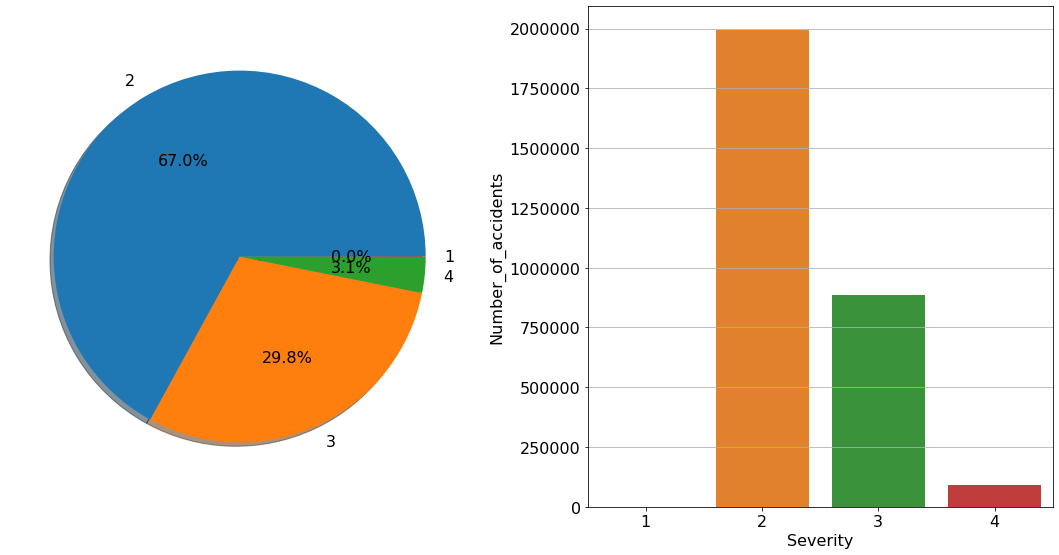

In [204]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.pie(severity_df['Number_of_accidents'],labels= ['2','3','4','1'],autopct = ('%1.1f%%'),shadow=True)
ax2.set_xlabel('Severity')
ax2.set_ylabel('Number of Accidents')
ax2.set_xticks(range(1,5))
ax2.grid()
sns.barplot(severity_df['Severity'],severity_df['Number_of_accidents'])
plt.tight_layout()
plt.show()

### Analysis

- As we can see that most of the accidents has severity 2 or 3 and more than 2/3rd of accidents occured had severity 2.    

## How many accidents occur in each state?

#### Pandas

In [205]:
%%time
per_state_accidents_count=column_group_count(usa_accident_data_filtered,'State')
per_state_accidents_count = per_state_accidents_count.sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
per_state_accidents_count

Wall time: 198 ms


,State,Number_of_accidents
0,CA,663204
1,TX,298062
2,FL,223746
3,SC,146689
4,NC,142460
5,NY,137799
6,PA,90395
7,MI,88694
8,IL,86390
9,GA,83620


#### Vaex

In [206]:
%%time
per_state_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'State')
per_state_accidents_count_vaex

Wall time: 1.24 s


CA    663204
TX    298062
FL    223746
SC    146689
NC    142460
NY    137799
PA     90395
MI     88694
IL     86390
GA     83620
VA     79957
OR     70840
MN     62727
AZ     62330
WA     61367
TN     58289
OH     55863
LA     52481
OK     51297
NJ     49942
MD     43328
UT     41385
CO     40124
AL     36369
MA     33014
IN     30040
MO     29012
CT     22803
NE     22505
KY     19122
WI     17580
RI     10483
IA     10346
NV      9524
NH      7064
KS      6887
MS      5961
NM      5020
DE      4434
DC      3653
WV      2274
ME      2065
ID      1757
AR      1749
VT       585
MT       504
WY       492
SD        60
ND        43
dtype: int64

#### Spark

In [207]:
%%time
per_state_accidents_count_spark = spark.sql("""
    SELECT State, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY State
    ORDER BY Number_Of_Accidents DESC
""")

per_state_accidents_count_spark.show()

+-----+-------------------+
|State|Number_Of_Accidents|
+-----+-------------------+
|   CA|             663204|
|   TX|             298062|
|   FL|             223746|
|   SC|             146689|
|   NC|             142460|
|   NY|             137799|
|   PA|              90395|
|   MI|              88694|
|   IL|              86390|
|   GA|              83620|
|   VA|              79957|
|   OR|              70840|
|   MN|              62727|
|   AZ|              62330|
|   WA|              61367|
|   TN|              58289|
|   OH|              55863|
|   LA|              52481|
|   OK|              51297|
|   NJ|              49942|
+-----+-------------------+
only showing top 20 rows

Wall time: 7.83 s


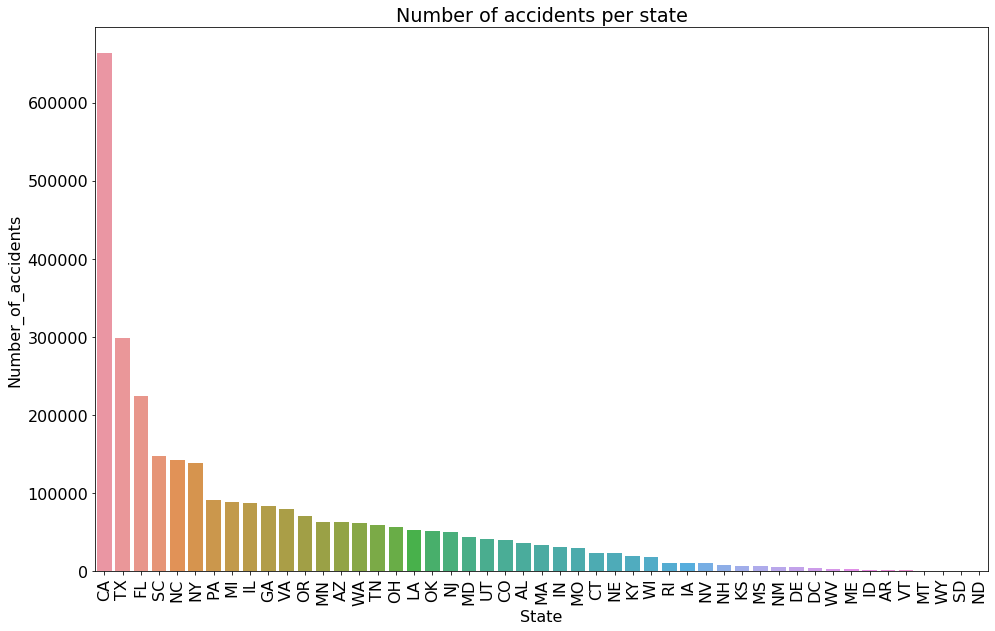

In [208]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
plt.title('Number of accidents per state')
sns.barplot(x="State",y="Number_of_accidents",data=per_state_accidents_count)
plt.show()

### Analysis:

- As we can see California has highest number of accidents in last 3 years, which is almost the one forth of the total accidents in United States!
- We can plot the same on map above.

### Let's plot very interesting graph which shows the count of accidents in terms of different color shades according to the number of accidents occured in each state.

In [209]:
fig = plt_go.Figure(data=plt_go.Choropleth(
    locations=per_state_accidents_count['State'],
    z = per_state_accidents_count['Number_of_accidents'].astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa',
)

fig.show()

# Severity of accidents in each state

#### Pandas

In [210]:
%%time
accidents_per_state_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_state_severity_1

Wall time: 135 ms


,State,Number_of_accidents
0,CA,246
1,TX,120
2,FL,71
3,SC,40
4,PA,37
5,MD,33
6,NC,30
7,WA,30
8,MI,29
9,VA,28


#### Vaex

In [211]:
%%time
accidents_per_state_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'State')
accidents_per_state_severity_1_vaex

Wall time: 300 ms


CA    246
TX    120
FL     71
SC     40
PA     37
MD     33
WA     30
NC     30
MI     29
VA     28
GA     27
NY     22
NJ     21
AZ     21
TN     20
LA     19
AL     18
CT     17
IN     17
OH     16
OK     15
IL     15
MA     15
NE     12
MN      9
MO      7
KY      7
CO      5
UT      3
IA      3
DE      3
OR      2
NH      2
DC      1
WV      1
ME      1
WI      1
NM      1
NV      1
VT      1
MS      1
dtype: int64

#### Spark

In [212]:
%%time
accidents_per_state_severity_1_spark = spark.sql("""
    SELECT State, COUNT(ID) AS Number_Of_Accidents FROM US_accidents 
    WHERE Severity = 1
    GROUP BY State
    ORDER BY Number_Of_Accidents DESC 

""")

accidents_per_state_severity_1_spark.show()

+-----+-------------------+
|State|Number_Of_Accidents|
+-----+-------------------+
|   CA|                246|
|   TX|                120|
|   FL|                 71|
|   SC|                 40|
|   PA|                 37|
|   MD|                 33|
|   NC|                 30|
|   WA|                 30|
|   MI|                 29|
|   VA|                 28|
|   GA|                 27|
|   NY|                 22|
|   NJ|                 21|
|   AZ|                 21|
|   TN|                 20|
|   LA|                 19|
|   AL|                 18|
|   CT|                 17|
|   IN|                 17|
|   OH|                 16|
+-----+-------------------+
only showing top 20 rows

Wall time: 8.17 s


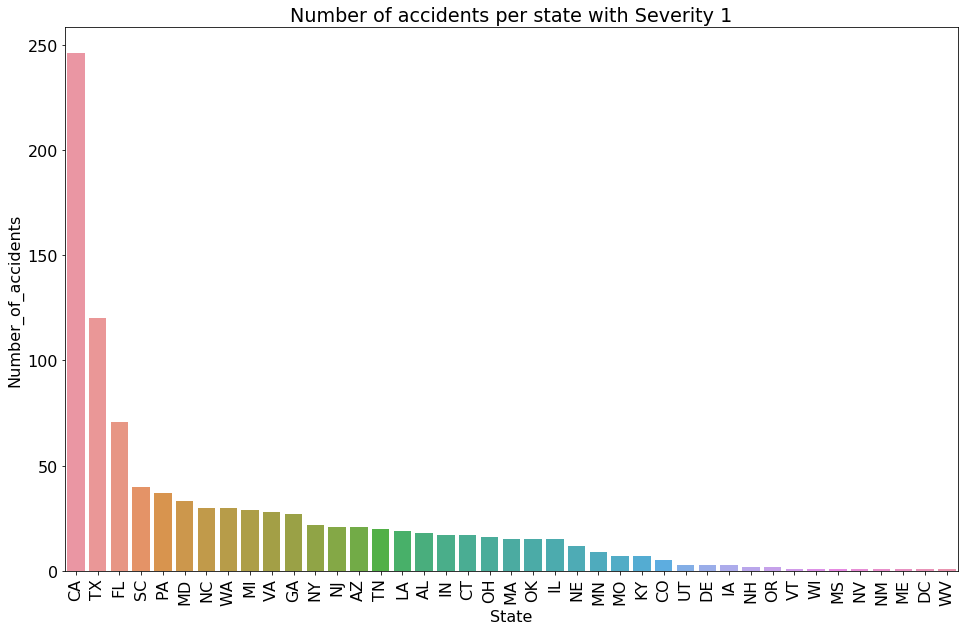

In [213]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.barplot(x= "State",y = "Number_of_accidents", data=accidents_per_state_severity_1)
plt.title('Number of accidents per state with Severity 1')
plt.show()

#### Pandas

In [214]:
%%time
accidents_per_state_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_state_severity_2

Wall time: 1.45 s


,State,Number_of_accidents
0,CA,445381
1,TX,215027
2,FL,144622
3,NC,121261
4,SC,114339
5,NY,82388
6,PA,67778
7,OR,61538
8,IL,58901
9,MI,52583


#### Vaex

In [215]:
%%time
accidents_per_state_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'State')
accidents_per_state_severity_2_vaex

Wall time: 158 ms


CA    445381
TX    215027
FL    144622
NC    121261
SC    114339
NY     82388
PA     67778
OR     61538
IL     58901
MI     52583
AZ     47248
OK     46194
VA     42556
LA     41674
TN     38526
WA     37528
MN     37017
GA     34605
OH     33817
NJ     33264
UT     29890
AL     23906
CO     21235
MD     20285
MA     19907
NE     18868
IN     18705
MO     12476
CT     10650
KY      9428
WI      8937
NV      6050
NH      5664
RI      4963
IA      4678
DE      3457
MS      3317
KS      3262
NM      2775
DC      2382
ME      1899
ID      1373
WV      1352
AR       860
VT       414
MT       263
WY       129
ND        21
SD        17
dtype: int64

#### Spark

In [216]:
%%time
accidents_per_state_severity_2_spark = spark.sql("""
    SELECT State, COUNT(ID) AS Number_Of_Accidents FROM US_accidents 
    WHERE Severity = 2
    GROUP BY State
    ORDER BY Number_Of_Accidents DESC 
""")

accidents_per_state_severity_2_spark.show()

+-----+-------------------+
|State|Number_Of_Accidents|
+-----+-------------------+
|   CA|             445381|
|   TX|             215027|
|   FL|             144622|
|   NC|             121261|
|   SC|             114339|
|   NY|              82388|
|   PA|              67778|
|   OR|              61538|
|   IL|              58901|
|   MI|              52583|
|   AZ|              47248|
|   OK|              46194|
|   VA|              42556|
|   LA|              41674|
|   TN|              38526|
|   WA|              37528|
|   MN|              37017|
|   GA|              34605|
|   OH|              33817|
|   NJ|              33264|
+-----+-------------------+
only showing top 20 rows

Wall time: 19.6 s


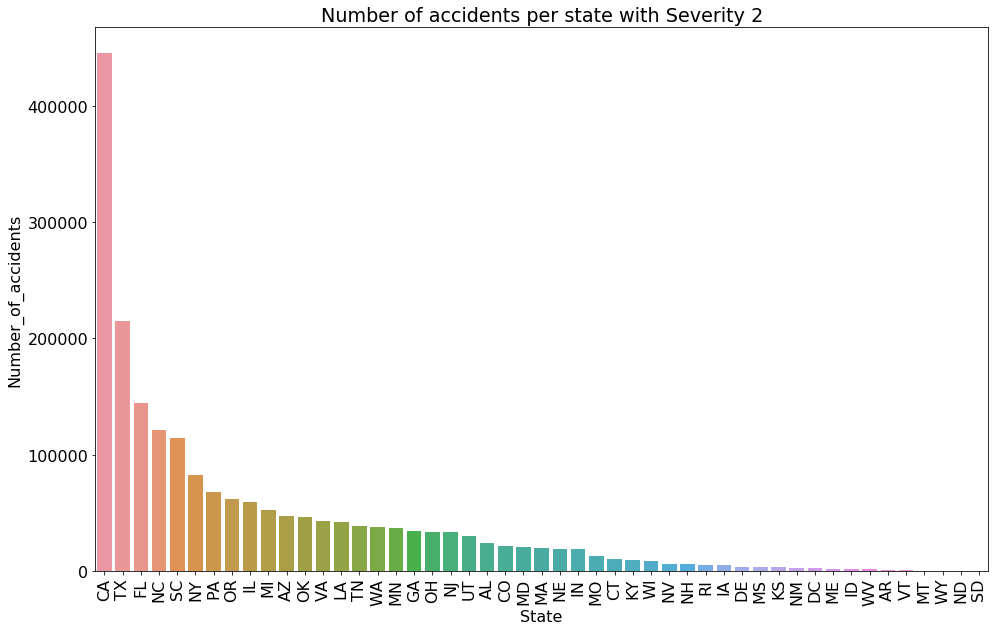

In [217]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_2)
plt.title('Number of accidents per state with Severity 2')
plt.show()

#### Pandas

In [218]:
%%time
accidents_per_state_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_state_severity_3

Wall time: 751 ms


,State,Number_of_accidents
0,CA,211189
1,TX,79467
2,FL,71631
3,NY,49968
4,GA,42393
5,VA,32750
6,SC,31366
7,MI,31361
8,MN,25348
9,IL,24706


#### Vaex

In [219]:
%%time
accidents_per_state_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'State')
accidents_per_state_severity_3_vaex

Wall time: 63 ms


CA    211189
TX     79467
FL     71631
NY     49968
GA     42393
VA     32750
SC     31366
MI     31361
MN     25348
IL     24706
WA     21129
NC     18837
MD     18341
TN     18275
PA     17862
OH     17057
CO     15699
MO     15090
NJ     13904
MA     12839
AZ     12003
AL     11931
CT     10455
UT     10301
LA      9887
KY      8927
IN      8826
OR      6921
WI      6182
RI      5418
IA      4828
OK      4677
NE      3370
KS      3246
NV      3043
MS      2373
NM      1917
NH      1232
DC       867
WV       467
AR       439
DE       400
ID       189
WY       176
MT       135
VT       111
ME        68
ND        11
SD         8
dtype: int64

#### Spark

In [220]:
%%time
accidents_per_state_severity_3_spark = spark.sql("""
    SELECT State, COUNT(ID) AS Number_Of_Accidents FROM US_accidents 
    WHERE Severity = 3
    GROUP BY State
    ORDER BY Number_Of_Accidents DESC 
""")

accidents_per_state_severity_3_spark.show()

+-----+-------------------+
|State|Number_Of_Accidents|
+-----+-------------------+
|   CA|             211189|
|   TX|              79467|
|   FL|              71631|
|   NY|              49968|
|   GA|              42393|
|   VA|              32750|
|   SC|              31366|
|   MI|              31361|
|   MN|              25348|
|   IL|              24706|
|   WA|              21129|
|   NC|              18837|
|   MD|              18341|
|   TN|              18275|
|   PA|              17862|
|   OH|              17057|
|   CO|              15699|
|   MO|              15090|
|   NJ|              13904|
|   MA|              12839|
+-----+-------------------+
only showing top 20 rows

Wall time: 8.58 s


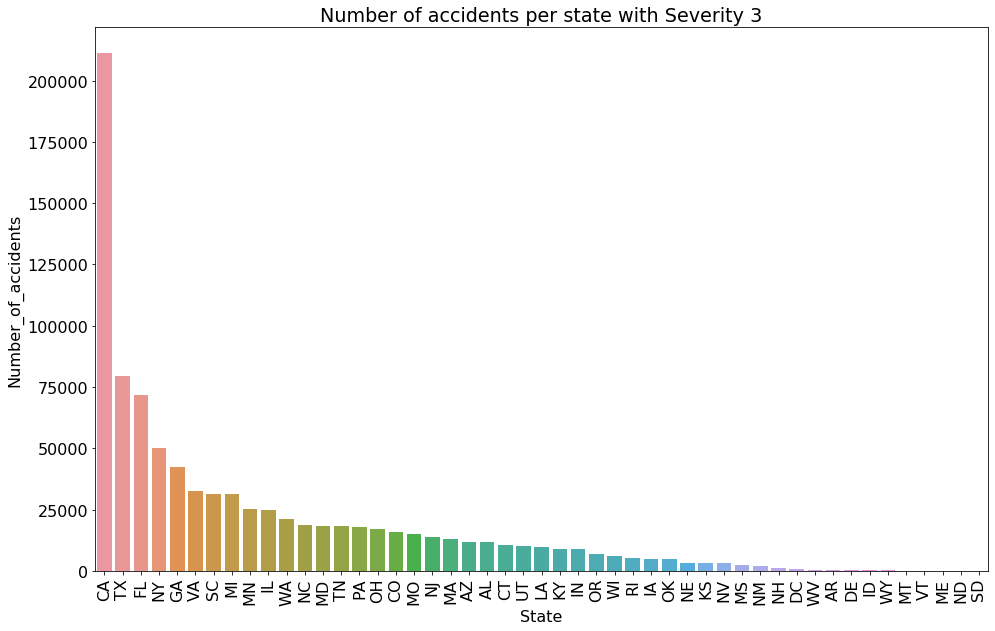

In [221]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_3)
plt.title('Number of accidents per state with Severity 3')
plt.show()

#### Pandas

In [222]:
%%time
accidents_per_state_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_state_severity_4

Wall time: 144 ms


,State,Number_of_accidents
0,FL,7422
1,GA,6595
2,CA,6388
3,NY,5421
4,OH,4973
5,MI,4721
6,PA,4718
7,MD,4669
8,VA,4623
9,TX,3448


#### Vaex

In [223]:
%%time
accidents_per_state_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'State')
accidents_per_state_severity_4_vaex

Wall time: 55 ms


FL    7422
GA    6595
CA    6388
NY    5421
OH    4973
MI    4721
PA    4718
MD    4669
VA    4623
TX    3448
CO    3185
AZ    3058
IL    2768
NJ    2753
WA    2680
IN    2492
WI    2460
OR    2379
NC    2332
CT    1681
TN    1468
MO    1439
UT    1191
SC     944
LA     901
IA     837
KY     760
DE     574
AL     514
WV     454
AR     450
NV     430
OK     411
DC     403
KS     379
MN     353
NM     327
MS     270
NE     255
MA     253
ID     195
WY     187
NH     166
MT     106
RI     102
ME      97
VT      59
SD      35
ND      11
dtype: int64

#### Spark

In [224]:
%%time
accidents_per_state_severity_4_spark = spark.sql("""
    SELECT State, COUNT(ID) AS Number_Of_Accidents FROM US_accidents 
    WHERE Severity = 4
    GROUP BY State
    ORDER BY Number_Of_Accidents DESC 

""")

accidents_per_state_severity_4_spark.show()

+-----+-------------------+
|State|Number_Of_Accidents|
+-----+-------------------+
|   FL|               7422|
|   GA|               6595|
|   CA|               6388|
|   NY|               5421|
|   OH|               4973|
|   MI|               4721|
|   PA|               4718|
|   MD|               4669|
|   VA|               4623|
|   TX|               3448|
|   CO|               3185|
|   AZ|               3058|
|   IL|               2768|
|   NJ|               2753|
|   WA|               2680|
|   IN|               2492|
|   WI|               2460|
|   OR|               2379|
|   NC|               2332|
|   CT|               1681|
+-----+-------------------+
only showing top 20 rows

Wall time: 8.3 s


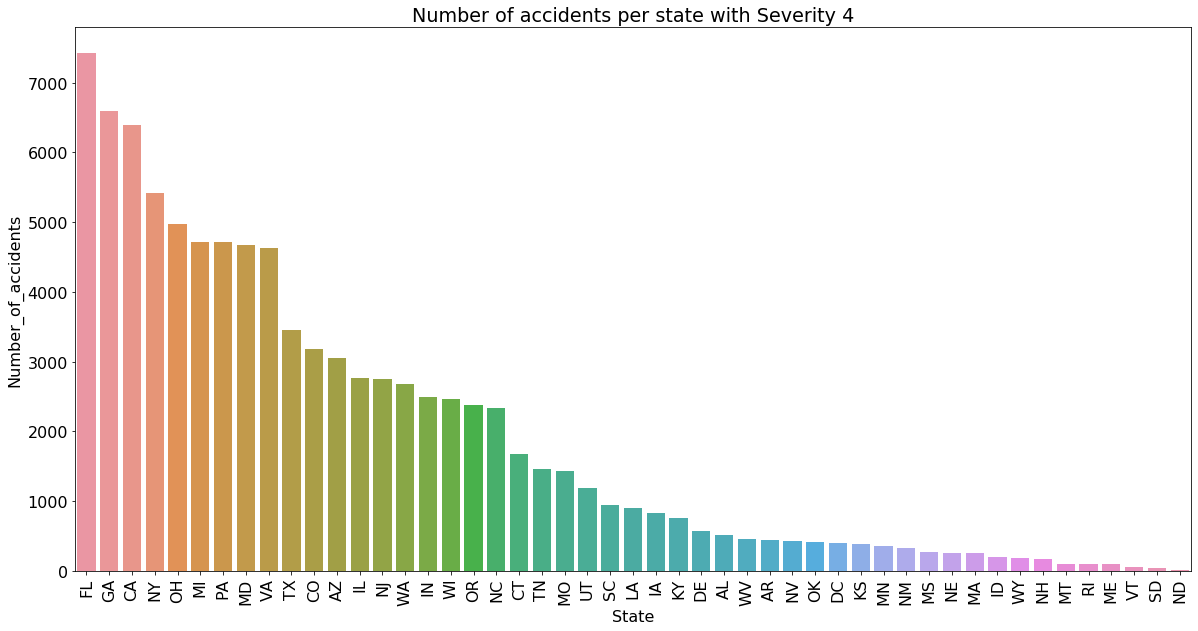

In [225]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_4)
plt.title('Number of accidents per state with Severity 4')
plt.show()

### Analysis
- Here, we can see that California shifted to 3rd position for the accidents with severity 4, but most surprisingly Georgia was 2nd in terms of most severe accidents. 
- Talking about the performance, vaex was the fastest among all the three tools followed by pandas and spark, respectively. 

# Top 10 counties with highest number of accidents

#### Pandas

In [226]:
%%time
county_accidents_count=column_group_count(usa_accident_data_filtered,'County')
county_accidents_count=county_accidents_count.sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
counties_with_more_number_of_accidents=county_accidents_count.head(10)
counties_with_more_number_of_accidents

Wall time: 345 ms


,County,Number_of_accidents
0,Los Angeles,227180
1,Harris,99134
2,Orange,75970
3,Mecklenburg,72762
4,Dallas,68558
5,Travis,63603
6,Montgomery,57256
7,Wake,52640
8,Maricopa,45524
9,Alameda,45367


#### Vaex

In [227]:
%%time
county_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'County')
counties_with_more_number_of_accidents_vaex=county_accidents_count_vaex.head(10)
counties_with_more_number_of_accidents_vaex

Wall time: 1.43 s


Los Angeles    227180
Harris          99134
Orange          75970
Mecklenburg     72762
Dallas          68558
Travis          63603
Montgomery      57256
Wake            52640
Maricopa        45524
Alameda         45367
dtype: int64

#### Spark

In [228]:
%%time
county_accidents_count_spark = spark.sql("""
    SELECT County, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY County 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
""")

county_accidents_count_spark.show()

+-----------+-------------------+
|     County|Number_Of_Accidents|
+-----------+-------------------+
|Los Angeles|             227180|
|     Harris|              99134|
|     Orange|              75970|
|Mecklenburg|              72762|
|     Dallas|              68558|
|     Travis|              63603|
| Montgomery|              57256|
|       Wake|              52640|
|   Maricopa|              45524|
|    Alameda|              45367|
+-----------+-------------------+

Wall time: 10.3 s


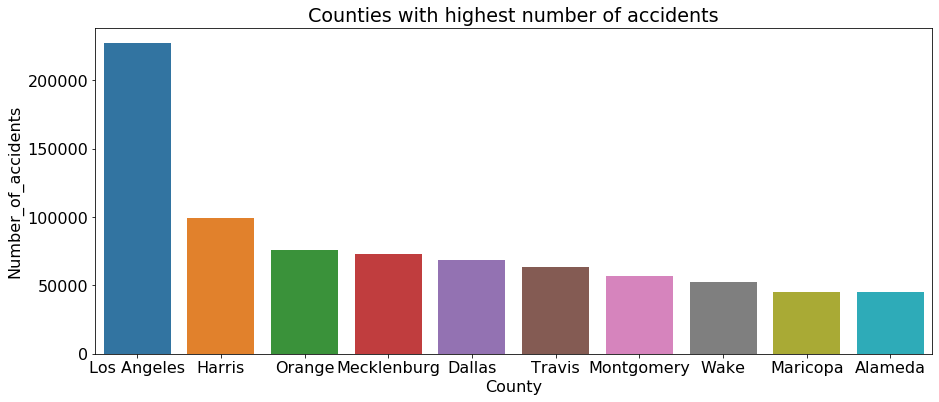

In [229]:
plt.figure(figsize=(15,6))
plt.title('Counties with highest number of accidents')
plt.xlabel('County')
plt.ylabel('Number of accidents')
sns.barplot(counties_with_more_number_of_accidents['County'],counties_with_more_number_of_accidents['Number_of_accidents'])
plt.show()

### Analysis
- As we can see that the Los Angeles county has highest number of accidents, which is more than double the number of accidents in any other county. It is surprisingly huge number!

## Top 10 Counties with most number of accidents accoding to severity

#### Pandas

In [230]:
%%time
accidents_per_county_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'County').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
counties_with_more_number_of_accidents_severity_1=accidents_per_county_severity_1.head(10)
counties_with_more_number_of_accidents_severity_1

Wall time: 48 ms


,County,Number_of_accidents
0,Harris,50
1,Los Angeles,46
2,Orange,25
3,San Diego,24
4,Dallas,22
5,Santa Clara,22
6,Alameda,21
7,King,19
8,Riverside,17
9,Montgomery,15


In [231]:
%%time
accidents_per_county_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'County').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
counties_with_more_number_of_accidents_severity_2=accidents_per_county_severity_2.head(10)
counties_with_more_number_of_accidents_severity_2

Wall time: 1.31 s


,County,Number_of_accidents
0,Los Angeles,137274
1,Harris,75771
2,Mecklenburg,67489
3,Travis,55622
4,Orange,53883
5,Montgomery,45581
6,Wake,44401
7,Dallas,40826
8,Maricopa,35056
9,Sacramento,28957


In [232]:
%%time
accidents_per_county_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'County').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
counties_with_more_number_of_accidents_severity_3=accidents_per_county_severity_3.head(10)
counties_with_more_number_of_accidents_severity_3

Wall time: 759 ms


,County,Number_of_accidents
0,Los Angeles,87614
1,Dallas,27054
2,Alameda,23792
3,Harris,22269
4,Orange,20546
5,San Diego,17360
6,Fulton,17251
7,San Bernardino,14222
8,Cook,13869
9,Jefferson,12981


In [233]:
%%time
accidents_per_county_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'County').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
counties_with_more_number_of_accidents_severity_4=accidents_per_county_severity_4.head(10)
counties_with_more_number_of_accidents_severity_4

Wall time: 153 ms


,County,Number_of_accidents
0,Los Angeles,2246
1,Miami-Dade,1762
2,Maricopa,1704
3,Orange,1516
4,Cook,1271
5,Fulton,1197
6,Montgomery,1177
7,Franklin,1069
8,Jefferson,1058
9,King,1045


#### vaex

In [234]:
%%time
accidents_per_county_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'County')
counties_with_more_number_of_accidents_severity_1_vaex=accidents_per_county_severity_1_vaex.head(10)
counties_with_more_number_of_accidents_severity_1_vaex

Wall time: 22 ms


Harris         50
Los Angeles    46
Orange         25
San Diego      24
Dallas         22
Santa Clara    22
Alameda        21
King           19
Riverside      17
Montgomery     15
dtype: int64

In [235]:
%%time
accidents_per_county_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'County')
counties_with_more_number_of_accidents_severity_2_vaex=accidents_per_county_severity_2_vaex.head(10)
counties_with_more_number_of_accidents_severity_2_vaex

Wall time: 156 ms


Los Angeles    137274
Harris          75771
Mecklenburg     67489
Travis          55622
Orange          53883
Montgomery      45581
Wake            44401
Dallas          40826
Maricopa        35056
Sacramento      28957
dtype: int64

In [236]:
%%time
accidents_per_county_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'County')
counties_with_more_number_of_accidents_severity_3_vaex=accidents_per_county_severity_3_vaex.head(10)
counties_with_more_number_of_accidents_severity_3_vaex

Wall time: 141 ms


Los Angeles       87614
Dallas            27054
Alameda           23792
Harris            22269
Orange            20546
San Diego         17360
Fulton            17251
San Bernardino    14222
Cook              13869
Jefferson         12981
dtype: int64

In [237]:
%%time
accidents_per_county_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'County')
counties_with_more_number_of_accidents_severity_4_vaex=accidents_per_county_severity_4_vaex.head(10)
counties_with_more_number_of_accidents_severity_4_vaex

Wall time: 60 ms


Los Angeles    2246
Miami-Dade     1762
Maricopa       1704
Orange         1516
Cook           1271
Fulton         1197
Montgomery     1177
Franklin       1069
Jefferson      1058
King           1045
dtype: int64

#### Spark

In [238]:
%%time
accidents_per_county_severity_1_spark = spark.sql("""
    SELECT County, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 1
    GROUP BY County 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
""")
accidents_per_county_severity_1_spark.show()

+-----------+-------------------+
|     County|Number_Of_Accidents|
+-----------+-------------------+
|     Harris|                 50|
|Los Angeles|                 46|
|     Orange|                 25|
|  San Diego|                 24|
|     Dallas|                 22|
|Santa Clara|                 22|
|    Alameda|                 21|
|       King|                 19|
|  Riverside|                 17|
| Montgomery|                 15|
+-----------+-------------------+

Wall time: 17.6 s


In [239]:
%%time
accidents_per_county_severity_2_spark = spark.sql("""
    SELECT County, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 2
    GROUP BY County 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
""")
accidents_per_county_severity_2_spark.show()

+-----------+-------------------+
|     County|Number_Of_Accidents|
+-----------+-------------------+
|Los Angeles|             137274|
|     Harris|              75771|
|Mecklenburg|              67489|
|     Travis|              55622|
|     Orange|              53883|
| Montgomery|              45581|
|       Wake|              44401|
|     Dallas|              40826|
|   Maricopa|              35056|
| Sacramento|              28957|
+-----------+-------------------+

Wall time: 11.2 s


In [240]:
%%time
accidents_per_county_severity_3_spark = spark.sql("""
    SELECT County, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 3
    GROUP BY County 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
""")

accidents_per_county_severity_3_spark.show()

+--------------+-------------------+
|        County|Number_Of_Accidents|
+--------------+-------------------+
|   Los Angeles|              87614|
|        Dallas|              27054|
|       Alameda|              23792|
|        Harris|              22269|
|        Orange|              20546|
|     San Diego|              17360|
|        Fulton|              17251|
|San Bernardino|              14222|
|          Cook|              13869|
|     Jefferson|              12981|
+--------------+-------------------+

Wall time: 10.1 s


In [241]:
%%time
accidents_per_county_severity_4_spark = spark.sql("""
    SELECT County, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 4
    GROUP BY County 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
""")
accidents_per_county_severity_4_spark.show()

+-----------+-------------------+
|     County|Number_Of_Accidents|
+-----------+-------------------+
|Los Angeles|               2246|
| Miami-Dade|               1762|
|   Maricopa|               1704|
|     Orange|               1516|
|       Cook|               1271|
|     Fulton|               1197|
| Montgomery|               1177|
|   Franklin|               1069|
|  Jefferson|               1058|
|       King|               1045|
+-----------+-------------------+

Wall time: 10.2 s


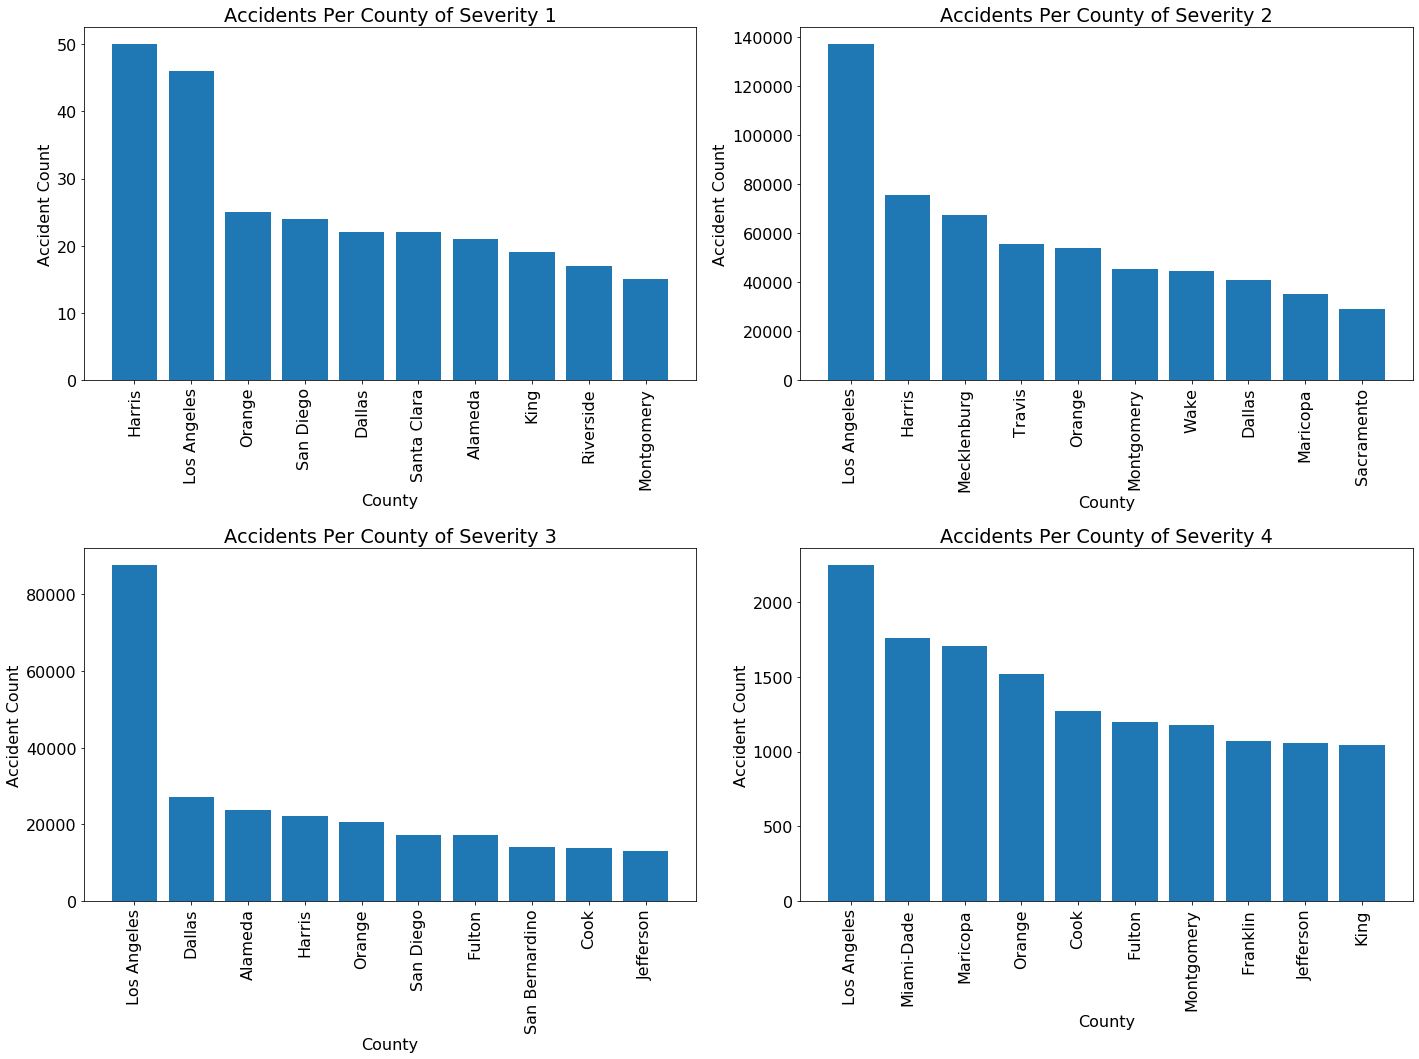

In [242]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20,15))
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_1,'County',ax1,1,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_2,'County',ax2,2,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_3,'County',ax3,3,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_4,'County',ax4,4,90)
plt.tight_layout()

### Analysis:
- Here, we have plotted the top 10 counties with the accidents for each severity.  
- From above four plots, it is apparent that Los Angeles County has more or less highest number of accidents of each severity.
- Among all severities, in the severity 4 Miami-Dade county was on 2nd position. While looking at other bar graphs, it didn't even exist in the top 10 list.

# Top 10 cities with highest number of accidents

#### Pandas

In [243]:
%%time
city_accidents_count=column_group_count(usa_accident_data_filtered,'City')
city_accidents_count=city_accidents_count.sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
top_cities_accidents_count=city_accidents_count.head(10)
top_cities_accidents_count

Wall time: 554 ms


,City,Number_of_accidents
0,Houston,93289
1,Charlotte,68054
2,Los Angeles,65851
3,Austin,58703
4,Dallas,58036
5,Raleigh,39628
6,Atlanta,37591
7,Miami,31160
8,Oklahoma City,30787
9,Baton Rouge,30232


#### Vaex

In [244]:
%%time
city_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'City')
city_accidents_count_vaex.pop('missing')
city_with_more_number_of_accidents_vaex=city_accidents_count_vaex.head(10)
city_with_more_number_of_accidents_vaex

Wall time: 1.97 s


Houston          93289
Charlotte        68054
Los Angeles      65851
Austin           58703
Dallas           58036
Raleigh          39628
Atlanta          37591
Miami            31160
Oklahoma City    30787
Baton Rouge      30232
dtype: int64

#### Spark

In [245]:
%%time
city_accidents_count_spark = spark.sql("""
    SELECT City, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY City 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
    """)
city_accidents_count_spark.show()

+-------------+-------------------+
|         City|Number_Of_Accidents|
+-------------+-------------------+
|      Houston|              93289|
|    Charlotte|              68054|
|  Los Angeles|              65851|
|       Austin|              58703|
|       Dallas|              58036|
|      Raleigh|              39628|
|      Atlanta|              37591|
|        Miami|              31160|
|Oklahoma City|              30787|
|  Baton Rouge|              30232|
+-------------+-------------------+

Wall time: 11.9 s


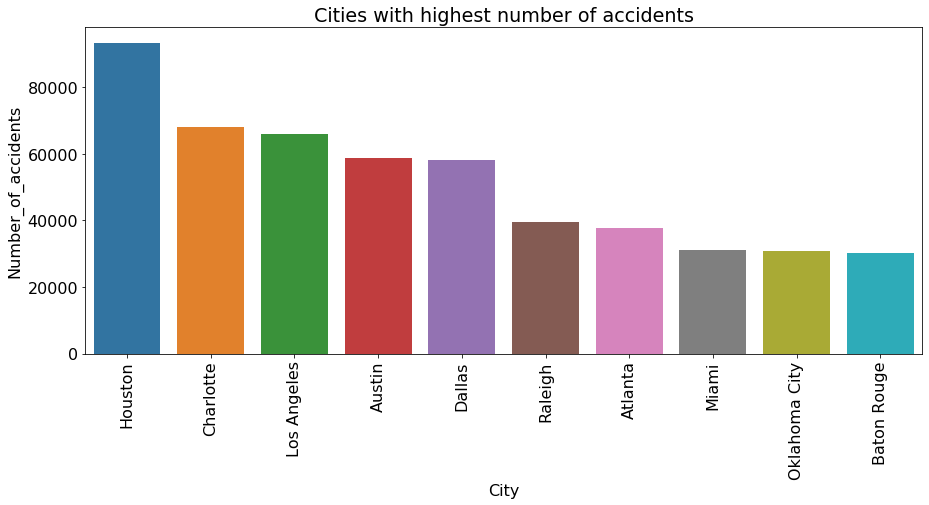

In [246]:
plt.figure(figsize=(15,6))
plt.title('Cities with highest number of accidents')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of accidents')
sns.barplot(top_cities_accidents_count['City'],top_cities_accidents_count['Number_of_accidents'])
plt.show()

### Analysis
- Even though Los Angeles county was 1st in highest number of accidents, the city itself is is at 3rd position for number of accidents. Surprisingly, 3 cities of Texas: Houston, Austin and Dallas are in top 5 cities with highest number of accidents. While 2 main cities of NC are also in the list.

## Top 10 Cities with most number of accidents according to severity

#### Pandas

In [247]:
%%time
accidents_per_city_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'City').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
cities_with_more_number_of_accidents_severity_1=accidents_per_city_severity_1.head(10)
cities_with_more_number_of_accidents_severity_1

Wall time: 146 ms


,City,Number_of_accidents
0,Houston,48
1,Dallas,18
2,Los Angeles,16
3,Charlotte,13
4,Atlanta,13
5,Austin,12
6,Orlando,11
7,Oklahoma City,11
8,San Jose,10
9,San Diego,9


In [248]:
accidents_per_city_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'City').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
cities_with_more_number_of_accidents_severity_2=accidents_per_city_severity_2.head(10)
cities_with_more_number_of_accidents_severity_2

,City,Number_of_accidents
0,Houston,72431
1,Charlotte,63360
2,Austin,51379
3,Los Angeles,39115
4,Dallas,36449
5,Raleigh,32854
6,Oklahoma City,27051
7,Baton Rouge,25610
8,Orlando,20895
9,Nashville,20215


In [249]:
accidents_per_city_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'City').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
cities_with_more_number_of_accidents_severity_3=accidents_per_city_severity_3.head(10)
cities_with_more_number_of_accidents_severity_3

,City,Number_of_accidents
0,Los Angeles,26186
1,Atlanta,22495
2,Dallas,21081
3,Houston,20056
4,Jacksonville,10601
5,Minneapolis,10506
6,Miami,9980
7,San Diego,9624
8,Saint Paul,8125
9,Nashville,7421


In [250]:
accidents_per_city_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'City').sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
cities_with_more_number_of_accidents_severity_4=accidents_per_city_severity_4.head(10)
cities_with_more_number_of_accidents_severity_4

,City,Number_of_accidents
0,Miami,1497
1,Atlanta,1382
2,Houston,754
3,Columbus,720
4,Chicago,678
5,Orlando,660
6,Seattle,605
7,Phoenix,603
8,Jacksonville,579
9,Los Angeles,534


#### vaex

In [251]:
%%time
accidents_per_city_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'City')
cities_with_more_number_of_accidents_severity_1_vaex=accidents_per_city_severity_1_vaex.head(10)
cities_with_more_number_of_accidents_severity_1_vaex

Wall time: 171 ms


Houston          48
Dallas           18
Los Angeles      16
Atlanta          13
Charlotte        13
Austin           12
Oklahoma City    11
Orlando          11
San Jose         10
San Diego         9
dtype: int64

In [252]:
%%time
accidents_per_city_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'City')
accidents_per_city_severity_2_vaex.pop('missing')
cities_with_more_number_of_accidents_severity_2_vaex=accidents_per_city_severity_2_vaex.head(10)
cities_with_more_number_of_accidents_severity_2_vaex

Wall time: 400 ms


Houston          72431
Charlotte        63360
Austin           51379
Los Angeles      39115
Dallas           36449
Raleigh          32854
Oklahoma City    27051
Baton Rouge      25610
Orlando          20895
Nashville        20215
dtype: int64

In [253]:
%%time
accidents_per_city_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'City')
accidents_per_city_severity_3_vaex.pop('missing')
cities_with_more_number_of_accidents_severity_3_vaex=accidents_per_city_severity_3_vaex.head(10)
cities_with_more_number_of_accidents_severity_3_vaex

Wall time: 202 ms


Los Angeles     26186
Atlanta         22495
Dallas          21081
Houston         20056
Jacksonville    10601
Minneapolis     10506
Miami            9980
San Diego        9624
Saint Paul       8125
Nashville        7421
dtype: int64

In [254]:
%%time
accidents_per_city_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'City')
accidents_per_city_severity_4_vaex.pop('missing')
cities_with_more_number_of_accidents_severity_4_vaex=accidents_per_city_severity_4_vaex.head(10)
cities_with_more_number_of_accidents_severity_4_vaex

Wall time: 255 ms


Miami           1497
Atlanta         1382
Houston          754
Columbus         720
Chicago          678
Orlando          660
Seattle          605
Phoenix          603
Jacksonville     579
Los Angeles      534
dtype: int64

#### Spark

In [255]:
%%time
accidents_per_city_severity_1_spark = spark.sql("""
    SELECT City, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 1
    GROUP BY City 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
    """)
accidents_per_city_severity_1_spark.show()

+-------------+-------------------+
|         City|Number_Of_Accidents|
+-------------+-------------------+
|      Houston|                 48|
|       Dallas|                 18|
|  Los Angeles|                 16|
|      Atlanta|                 13|
|    Charlotte|                 13|
|       Austin|                 12|
|Oklahoma City|                 11|
|      Orlando|                 11|
|     San Jose|                 10|
|        Omaha|                  9|
+-------------+-------------------+

Wall time: 39.6 s


In [256]:
%%time
accidents_per_city_severity_2_spark = spark.sql("""
    SELECT City, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 2
    GROUP BY City 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
    """)
accidents_per_city_severity_2_spark.show()

+-------------+-------------------+
|         City|Number_Of_Accidents|
+-------------+-------------------+
|      Houston|              72431|
|    Charlotte|              63360|
|       Austin|              51379|
|  Los Angeles|              39115|
|       Dallas|              36449|
|      Raleigh|              32854|
|Oklahoma City|              27051|
|  Baton Rouge|              25610|
|      Orlando|              20895|
|    Nashville|              20215|
+-------------+-------------------+

Wall time: 16.3 s


In [257]:
%%time
accidents_per_city_severity_3_spark = spark.sql("""
    SELECT City, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 3
    GROUP BY City 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
    """)
accidents_per_city_severity_3_spark.show()

+------------+-------------------+
|        City|Number_Of_Accidents|
+------------+-------------------+
| Los Angeles|              26186|
|     Atlanta|              22495|
|      Dallas|              21081|
|     Houston|              20056|
|Jacksonville|              10601|
| Minneapolis|              10506|
|       Miami|               9980|
|   San Diego|               9624|
|  Saint Paul|               8125|
|   Nashville|               7421|
+------------+-------------------+

Wall time: 12.6 s


In [258]:
%%time
accidents_per_city_severity_4_spark = spark.sql("""
    SELECT City, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Severity = 4
    GROUP BY City 
    ORDER BY Number_Of_Accidents DESC 
    LIMIT 10
    """)
accidents_per_city_severity_4_spark.show()

+------------+-------------------+
|        City|Number_Of_Accidents|
+------------+-------------------+
|       Miami|               1497|
|     Atlanta|               1382|
|     Houston|                754|
|    Columbus|                720|
|     Chicago|                678|
|     Orlando|                660|
|     Seattle|                605|
|     Phoenix|                603|
|Jacksonville|                579|
| Los Angeles|                534|
+------------+-------------------+

Wall time: 14.3 s


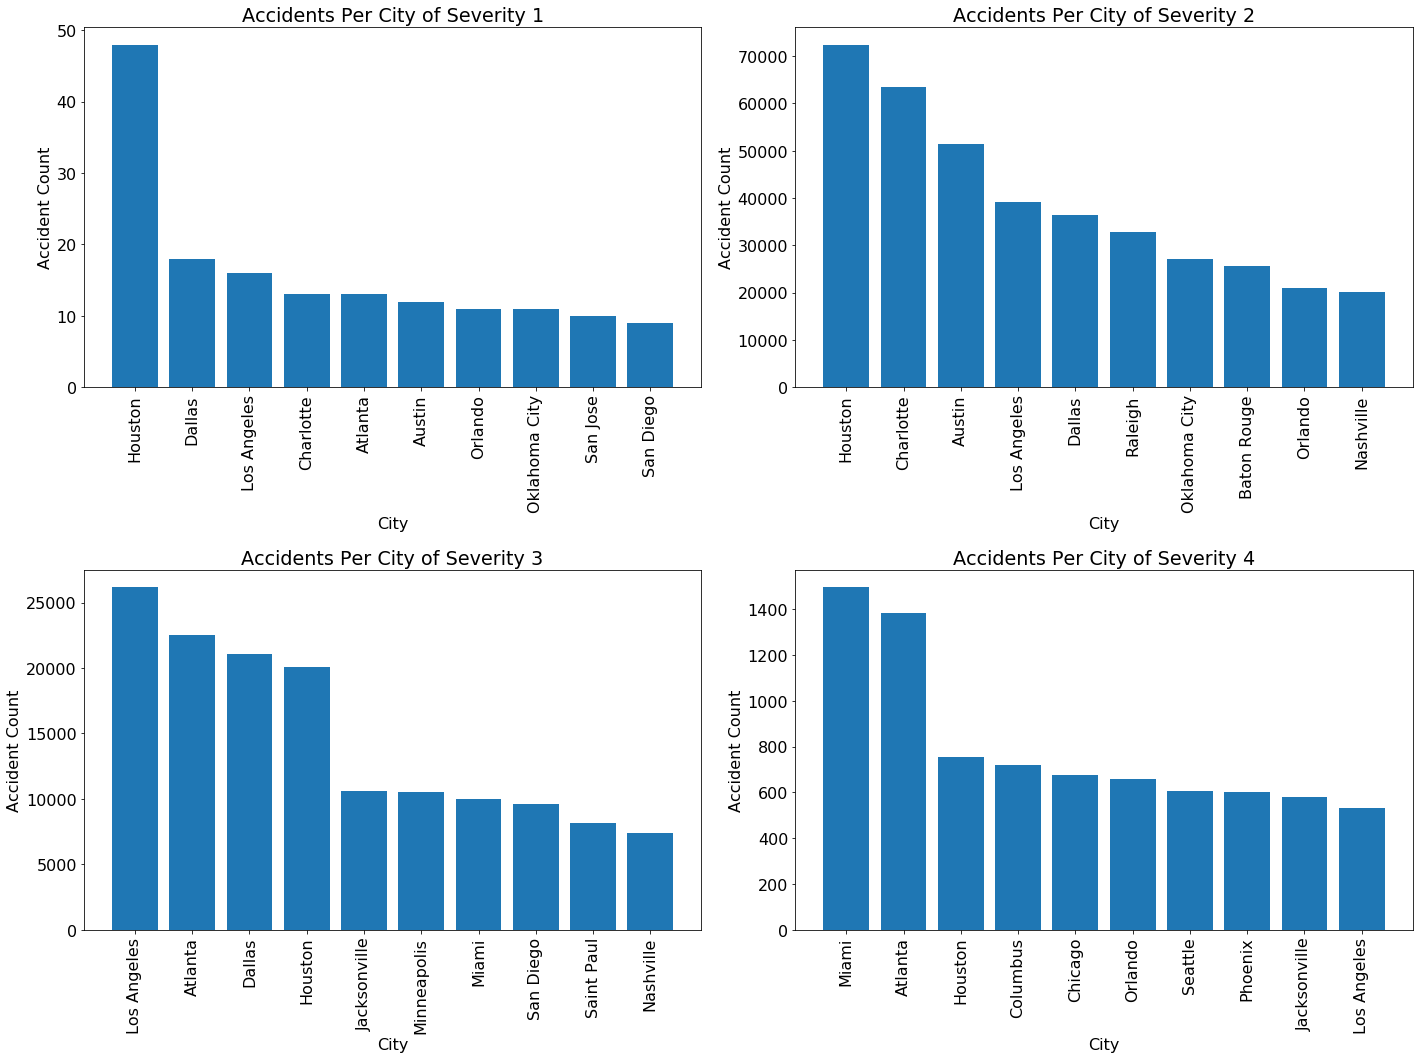

In [259]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20,15))
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_1,'City',ax1,1,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_2,'City',ax2,2,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_3,'City',ax3,3,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_4,'City',ax4,4,90)  
plt.tight_layout()

### Analysis
- Here, we can clearly see that even though Los Angles County was almost having highest number of accidents in each severity, the city itself is showing less number of accidents in each severity.
- Houston was having most number of severity 1 and severity 2 accidents, while surprisingly Atlanta was 2nd in terms of most severe accidents.

## How many accidents occur in day and night?

#### pandas

In [260]:
%%time
day_night_accidents_count=column_group_count(usa_accident_data_filtered,'Sunrise_Sunset')
day_night_accidents_count

Wall time: 317 ms


,Sunrise_Sunset,Number_of_accidents
0,Day,2194084
1,Night,780158


#### vaex

In [261]:
%%time
day_night_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'Sunrise_Sunset')
day_night_accidents_count_vaex

Wall time: 1.36 s


missing         93
Day        2194084
Night       780158
dtype: int64

#### Spark

In [262]:
%%time
day_night_accidents_count_spark = spark.sql("""
        SELECT Sunrise_Sunset, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
        WHERE Sunrise_Sunset IS NOT NULL
        GROUP BY Sunrise_Sunset
        
""")
day_night_accidents_count_spark.show()

+--------------+-------------------+
|Sunrise_Sunset|Number_Of_Accidents|
+--------------+-------------------+
|         Night|             780158|
|           Day|            2194084|
+--------------+-------------------+

Wall time: 11.6 s


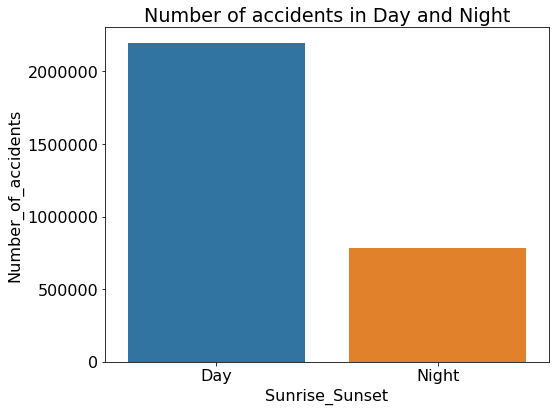

In [263]:
plt.figure(figsize=(8,6))
plt.title('Number of accidents in Day and Night')
plt.xlabel('Time')
plt.ylabel('Number of accidents')
sns.barplot(day_night_accidents_count['Sunrise_Sunset'],day_night_accidents_count['Number_of_accidents'])
plt.tight_layout()
plt.show()

### Analysis
- We can clearly see that most of the accidents occur in the sun light.

## How many accidents occur in each year?

#### pandas

In [264]:
%%time
per_year_accidents_count=column_group_count(usa_accident_data_filtered,'Year')
per_year_accidents_count

Wall time: 92.9 ms


,Year,Number_of_accidents
0,2015,1
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630
5,2020,6


As we can see that we have so much small data of 2015 and 2020, we should not consider them 

In [265]:
per_year_accidents_count=per_year_accidents_count[(per_year_accidents_count['Year']!=2015) & (per_year_accidents_count['Year']!=2020)]
per_year_accidents_count

,Year,Number_of_accidents
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630


#### vaex

In [266]:
%%time
per_year_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'Year')
per_year_accidents_count_vaex.pop(2020)
per_year_accidents_count_vaex.pop(2015)
per_year_accidents_count_vaex

Wall time: 2.09 s


2019    953630
2018    892615
2017    717483
2016    410600
dtype: int64

#### Spark

In [267]:
%%time
per_year_accidents_count_spark = spark.sql("""
    SELECT Year, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    WHERE Year IN (2016,2017,2018,2019)
    GROUP BY Year
    ORDER BY Year ASC
""")
per_year_accidents_count_spark.show()

+----+-------------------+
|Year|Number_Of_Accidents|
+----+-------------------+
|2016|             410600|
|2017|             717483|
|2018|             892615|
|2019|             953630|
+----+-------------------+

Wall time: 10.7 s


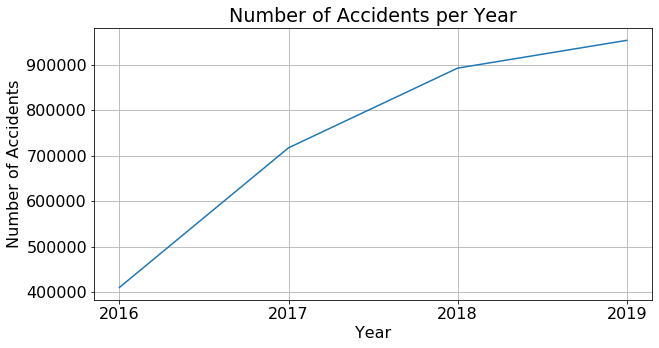

In [268]:
plt.figure(figsize=(10,5))
plt.plot(per_year_accidents_count['Year'],per_year_accidents_count['Number_of_accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.xticks(range(2016,2020))
plt.title('Number of Accidents per Year')
plt.show()

### Analysis
- By examining the graph, we can say that number of accidents have increased significantly every year. 2019 had more than double the number of accidents, compare to 2016.

## How many accidents occur in each month?

#### pandas

In [269]:
%%time
per_month_accidents_count=column_group_count(usa_accident_data_filtered,'Month')
per_month_accidents_count

Wall time: 113 ms


,Month,Number_of_accidents
0,1,209972
1,2,198649
2,3,207427
3,4,211763
4,5,209060
5,6,210025
6,7,222959
7,8,288912
8,9,292430
9,10,324525


#### vaex

In [270]:
%%time
per_month_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'Month')
per_month_accidents_count_vaex

Wall time: 797 ms


10    324525
12    299558
11    299055
9     292430
8     288912
7     222959
4     211763
6     210025
1     209972
5     209060
3     207427
2     198649
dtype: int64

#### Spark

In [271]:
%%time
per_month_accidents_count_spark = spark.sql("""
    SELECT Month, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    GROUP BY Month
    ORDER BY Month ASC    
""")
per_month_accidents_count_spark.show()

+-----+-------------------+
|Month|Number_Of_Accidents|
+-----+-------------------+
|    1|             209972|
|    2|             198649|
|    3|             207427|
|    4|             211763|
|    5|             209060|
|    6|             210025|
|    7|             222959|
|    8|             288912|
|    9|             292430|
|   10|             324525|
|   11|             299055|
|   12|             299558|
+-----+-------------------+

Wall time: 13.9 s


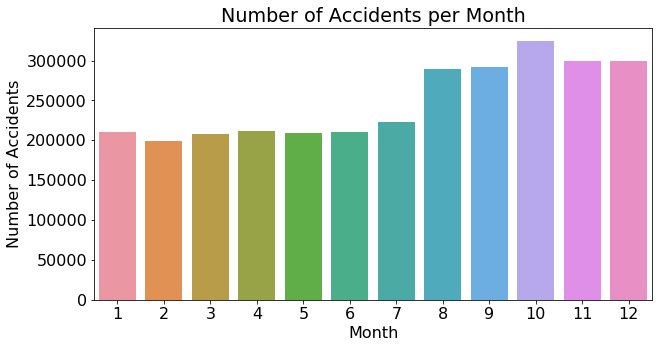

In [272]:
plt.figure(figsize=(10,5))
sns.barplot(per_month_accidents_count['Month'],per_month_accidents_count['Number_of_accidents'])
plt.xlabel('Month')
plt.xticks(range(0,12))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.show()

### Analysis
- The number of accidents is showing a significant increase during last 5 months of a year, with a peak in october.

## How Month affects Severity

#### pandas

In [273]:
%%time
accidents_per_month_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Month')
accidents_per_month_severity_1

Wall time: 38 ms


,Month,Number_of_accidents
0,1,56
1,2,79
2,3,64
3,4,58
4,5,71
5,6,90
6,7,79
7,8,105
8,9,97
9,10,91


In [274]:
%%time
accidents_per_month_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Month')
accidents_per_month_severity_2

Wall time: 1.35 s


,Month,Number_of_accidents
0,1,135962
1,2,129973
2,3,135713
3,4,139305
4,5,137597
5,6,132654
6,7,144107
7,8,193419
8,9,201901
9,10,229577


In [275]:
%%time
accidents_per_month_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Month')
accidents_per_month_severity_3

Wall time: 719 ms


,Month,Number_of_accidents
0,1,66865
1,2,62043
2,3,64618
3,4,65642
4,5,64016
5,6,69845
6,7,70772
7,8,87390
8,9,82684
9,10,86064


In [276]:
%%time
accidents_per_month_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Month')
accidents_per_month_severity_4

Wall time: 149 ms


,Month,Number_of_accidents
0,1,7089
1,2,6554
2,3,7032
3,4,6758
4,5,7376
5,6,7436
6,7,8001
7,8,7998
8,9,7748
9,10,8793


#### vaex

In [277]:
%%time
accidents_per_month_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'Month')
accidents_per_month_severity_1_vaex

Wall time: 19 ms


8     105
11     97
9      97
10     91
6      90
12     81
7      79
2      79
5      71
3      64
4      58
1      56
dtype: int64

In [278]:
%%time
accidents_per_month_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'Month')
accidents_per_month_severity_2_vaex

Wall time: 46 ms


10    229577
12    207781
11    205421
9     201901
8     193419
7     144107
4     139305
5     137597
1     135962
3     135713
6     132654
2     129973
dtype: int64

In [279]:
%%time
accidents_per_month_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'Month')
accidents_per_month_severity_3_vaex

Wall time: 199 ms


8     87390
10    86064
11    85371
9     82684
12    82310
7     70772
6     69845
1     66865
4     65642
3     64618
5     64016
2     62043
dtype: int64

In [280]:
%%time
accidents_per_month_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'Month')
accidents_per_month_severity_4_vaex

Wall time: 31 ms


12    9386
10    8793
11    8166
7     8001
8     7998
9     7748
6     7436
5     7376
1     7089
3     7032
4     6758
2     6554
dtype: int64

#### Spark

In [281]:
%%time
accidents_per_month_severity_1_spark = spark.sql("""
    SELECT Month as Month_Severity1, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    Where Severity = 1
    GROUP BY Month_Severity1
    ORDER BY Month_Severity1 ASC
""")
accidents_per_month_severity_1_spark.show()

+---------------+-------------------+
|Month_Severity1|Number_Of_Accidents|
+---------------+-------------------+
|              1|                 56|
|              2|                 79|
|              3|                 64|
|              4|                 58|
|              5|                 71|
|              6|                 90|
|              7|                 79|
|              8|                105|
|              9|                 97|
|             10|                 91|
|             11|                 97|
|             12|                 81|
+---------------+-------------------+

Wall time: 21.3 s


In [282]:
%%time
accidents_per_month_severity_2_spark = spark.sql("""
    SELECT Month as Month_Severity2, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    Where Severity = 2
    GROUP BY Month_Severity2
    ORDER BY Month_Severity2 ASC
""")
accidents_per_month_severity_2_spark.show()

+---------------+-------------------+
|Month_Severity2|Number_Of_Accidents|
+---------------+-------------------+
|              1|             135962|
|              2|             129973|
|              3|             135713|
|              4|             139305|
|              5|             137597|
|              6|             132654|
|              7|             144107|
|              8|             193419|
|              9|             201901|
|             10|             229577|
|             11|             205421|
|             12|             207781|
+---------------+-------------------+

Wall time: 12.7 s


In [283]:
%%time
accidents_per_month_severity_3_spark = spark.sql("""
    SELECT Month as Month_Severity3, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    Where Severity = 3
    GROUP BY Month_Severity3
    ORDER BY Month_Severity3 ASC
""")
accidents_per_month_severity_3_spark.show()

+---------------+-------------------+
|Month_Severity3|Number_Of_Accidents|
+---------------+-------------------+
|              1|              66865|
|              2|              62043|
|              3|              64618|
|              4|              65642|
|              5|              64016|
|              6|              69845|
|              7|              70772|
|              8|              87390|
|              9|              82684|
|             10|              86064|
|             11|              85371|
|             12|              82310|
+---------------+-------------------+

Wall time: 11.9 s


In [284]:
%%time
accidents_per_month_severity_4_spark = spark.sql("""
    SELECT Month as Month_Severity4, COUNT(ID) AS Number_Of_Accidents FROM US_accidents
    Where Severity = 4
    GROUP BY Month_Severity4
    ORDER BY Month_Severity4 ASC
""")
accidents_per_month_severity_4_spark.show()

+---------------+-------------------+
|Month_Severity4|Number_Of_Accidents|
+---------------+-------------------+
|              1|               7089|
|              2|               6554|
|              3|               7032|
|              4|               6758|
|              5|               7376|
|              6|               7436|
|              7|               8001|
|              8|               7998|
|              9|               7748|
|             10|               8793|
|             11|               8166|
|             12|               9386|
+---------------+-------------------+

Wall time: 7.78 s


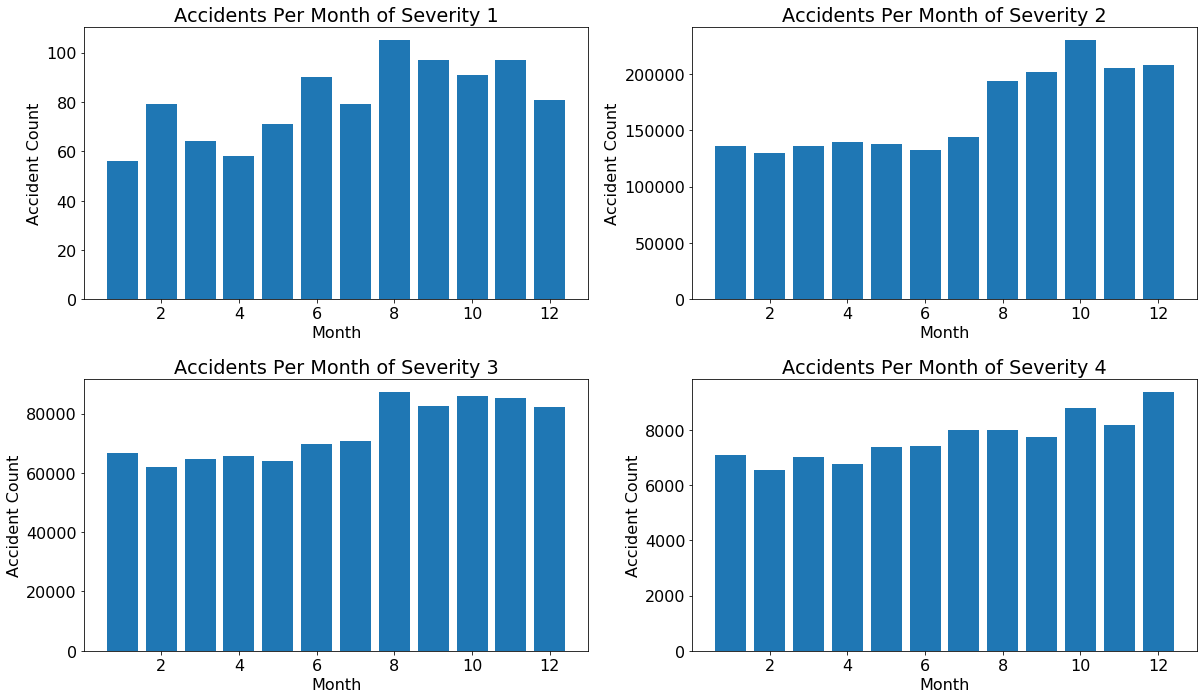

In [285]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,10))
bar_plot_by_severity(accidents_per_month_severity_1,'Month',ax1,1,0)
bar_plot_by_severity(accidents_per_month_severity_2,'Month',ax2,2,0)
bar_plot_by_severity(accidents_per_month_severity_3,'Month',ax3,3,0)
bar_plot_by_severity(accidents_per_month_severity_4,'Month',ax4,4,0)
plt.tight_layout()

### Analysis
- Each severity is showing similar trend as to general behaviour
- Specifically, late summer and early winter months are showing more number of accidents
    

## How many accidents occur each hour?

#### pandas

In [ ]:
%%time
Weekday_data=usa_accident_data_filtered[(usa_accident_data_filtered['Week_day']==0) |(usa_accident_data_filtered['Week_day']==1) |(usa_accident_data_filtered['Week_day']==2) |(usa_accident_data_filtered['Week_day']==3) |(usa_accident_data_filtered['Week_day']==4)]

In [ ]:
%%time
weekday_per_hour_accidents_count=column_group_count(Weekday_data,'Hour')
weekday_per_hour_accidents_count

In [ ]:
Weekend_data=usa_accident_data_filtered[(usa_accident_data_filtered['Week_day']==5) | (usa_accident_data_filtered['Week_day']==6)]

In [ ]:
%%time
weekend_per_hour_accidents_count=column_group_count(Weekend_data,'Hour')
weekend_per_hour_accidents_count

#### vaex

In [ ]:
%%time
Weekday_data_vaex=usa_accident_data_vaex[(usa_accident_data_vaex.Week_day==0) | (usa_accident_data_vaex.Week_day==1) |(usa_accident_data_vaex.Week_day==2) | (usa_accident_data_vaex.Week_day==3) |(usa_accident_data_vaex.Week_day==4)]
Weekday_data_vaex

In [ ]:
%%time
weekday_per_hour_accidents_count_vaex=column_group_count_vaex(Weekday_data_vaex,'Hour')
weekday_per_hour_accidents_count_vaex

In [ ]:
%%time
Weekend_data_vaex=usa_accident_data_vaex[(usa_accident_data_vaex.Week_day==5) | (usa_accident_data_vaex.Week_day==6)]
Weekend_data_vaex

In [ ]:
%%time
weekend_per_hour_accidents_count_vaex=column_group_count_vaex(Weekend_data_vaex,'Hour')
weekend_per_hour_accidents_count_vaex

#### Spark

In [ ]:
%%time
weekday_per_hour_accidents_count_spark = spark.sql("""
    SELECT Hour, COUNT(ID) AS Number_Of_Accidents
    FROM US_accidents
    WHERE day_of_week IN (2,3,4,5,6)
    GROUP BY Hour
    ORDER BY Hour ASC
""")
weekday_per_hour_accidents_count_spark.show()

In [ ]:
%%time
weekend_per_hour_accidents_count_spark = spark.sql("""
    SELECT Hour, COUNT(ID) AS Number_Of_Accidents
    FROM US_accidents
    WHERE day_of_week IN (1,7)
    GROUP BY Hour
    ORDER BY Hour ASC
""")
weekend_per_hour_accidents_count_spark.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.plot(weekday_per_hour_accidents_count['Hour'],weekday_per_hour_accidents_count['Number_of_accidents'])
ax1.set_title("Accidents Per Hour on Weekdays" )
ax1.set_xlabel("Hour")
ax1.set_ylabel("Accident Count")
ax1.set_xticks(range(0,24))
ax1.grid()

ax2.set_title("Accidents Per Hour on Weekends" )
ax2.set_xlabel("Hour")
ax2.set_ylabel("Accident Count")
ax2.set_xticks(range(0,24))
ax2.plot(weekend_per_hour_accidents_count['Hour'],weekend_per_hour_accidents_count['Number_of_accidents'])
ax2.grid()
plt.show()

### Analysis
- As we can clearly see that accidents peak hour changed during weekdays and weekends.
- During weekdays, most of accidents occured between 7-8 in the morning and 4-5 in the evening. It might be because at that time most of the people were whether going to or coming back from their work  
- While, during weekends it was completely different. Most of the accidents occured between 12-2 in the afternoon.

## Number of accidents per day of week 

#### pandas

In [ ]:
%%time
per_day_accidents_count=column_group_count(usa_accident_data_filtered,'Week_day')
per_day_accidents_count.Week_day.replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],inplace=True)
per_day_accidents_count=per_day_accidents_count.sort_values(by='Number_of_accidents',ascending=False)
per_day_accidents_count

#### vaex

In [ ]:
%%time
per_day_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'Week_day')
per_day_accidents_count_vaex

#### spark

In [ ]:
%%time
per_day_accidents_count_vaex_spark = spark.sql("""
    SELECT day_of_week,
    CASE 
        WHEN day_of_week = 1 THEN 'SUN'
        WHEN day_of_week = 2 THEN 'MON'
        WHEN day_of_week = 3 THEN 'TUE'
        WHEN day_of_week = 4 THEN 'WED'
        WHEN day_of_week = 5 THEN 'THU'
        WHEN day_of_week = 6 THEN 'FRI'
        WHEN day_of_week = 7 THEN 'SAT'
    END AS Week_Day
    ,COUNT(ID) AS Number_of_accidents FROM US_accidents
    GROUP BY day_of_week
    
    """)
per_day_accidents_count_vaex_spark.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(per_day_accidents_count['Week_day'],per_day_accidents_count['Number_of_accidents'])
plt.xlabel('Day')
plt.xticks(range(0,7))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Week Day')

### Analysis
- We can clearly see that most of the accidents have occured during weekdays. While during weekend, the number of accidents have decreased to less than half the number of accidents than weekdays.

## How each day of week affects Severity

#### pandas

In [ ]:
%%time
accidents_per_day_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Week_day')
accidents_per_day_severity_1

In [ ]:
%%time
accidents_per_day_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Week_day')
accidents_per_day_severity_2

In [ ]:
%%time
accidents_per_day_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Week_day')
accidents_per_day_severity_3

In [ ]:
%%time
accidents_per_day_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Week_day')
accidents_per_day_severity_4

#### vaex

In [ ]:
%%time
accidents_per_day_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'Week_day')
accidents_per_day_severity_1_vaex

In [ ]:
%%time
accidents_per_day_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'Week_day')
accidents_per_day_severity_2_vaex

In [ ]:
%%time
accidents_per_day_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'Week_day')
accidents_per_day_severity_3_vaex

In [ ]:
%%time
accidents_per_day_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'Week_day')
accidents_per_day_severity_4_vaex

#### Spark

In [ ]:
%%time
accidents_per_day_severity_1_spark = spark.sql("""
    SELECT day_of_week, COUNT(ID) AS Number_of_accidents FROM US_accidents
    WHERE Severity = 1
    GROUP BY day_of_week
    
    """)
accidents_per_day_severity_1_spark.show()

In [ ]:
%%time
accidents_per_day_severity_2_spark = spark.sql("""
    SELECT day_of_week, COUNT(ID) AS Number_OF_Accidents 
    FROM US_accidents
    WHERE Severity = 2
    GROUP BY day_of_week
""")
accidents_per_day_severity_2_spark.show()

In [ ]:
%%time
accidents_per_day_severity_3_spark = spark.sql("""
    SELECT day_of_week, COUNT(ID) AS Number_OF_Accidents 
    FROM US_accidents
    WHERE Severity = 3
    GROUP BY day_of_week
""")
accidents_per_day_severity_3_spark.show()

In [ ]:
%%time
accidents_per_day_severity_4_spark = spark.sql("""
    SELECT day_of_week, COUNT(ID) AS Number_OF_Accidents 
    FROM US_accidents
    WHERE Severity = 4
    GROUP BY day_of_week
""")
accidents_per_day_severity_4_spark.show()

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,10))
bar_plot_by_severity(accidents_per_day_severity_1,'Week_day',ax1,1,0)
bar_plot_by_severity(accidents_per_day_severity_2,'Week_day',ax2,2,0)
bar_plot_by_severity(accidents_per_day_severity_3,'Week_day',ax3,3,0)
bar_plot_by_severity(accidents_per_day_severity_4,'Week_day',ax4,4,0)
plt.tight_layout()

### Analysis
- It is apparent that each severity is showing similar trend as to general behaviour

## How various weather conditions affect accidents

#### pandas

In [ ]:
%%time
per_weather_accidents_count=column_group_count(usa_accident_data_filtered,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
per_weather_accidents_count=per_weather_accidents_count.head(15)
per_weather_accidents_count

#### vaex

In [ ]:
%%time
per_weather_accidents_count_vaex=column_group_count_vaex(usa_accident_data_vaex,'Weather_Condition')
per_weather_accidents_count_vaex.pop('missing')
per_weather_accidents_count_vaex=per_weather_accidents_count_vaex.head(15)
per_weather_accidents_count_vaex

#### Spark

In [ ]:
%%time
per_weather_accidents_count_spark = spark.sql("""
    SELECT Weather_Condition, COUNT(ID) AS Number_of_Accidents FROM US_accidents
    GROUP BY Weather_Condition 
    ORDER BY Number_of_Accidents DESC
    LIMIT 15
    
""")
per_weather_accidents_count_spark.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Weather Condition')
plt.xticks(rotation=90)
plt.bar(per_weather_accidents_count['Weather_Condition'],per_weather_accidents_count['Number_of_accidents'])

### Analysis
- As we can see that most of the accidents have occured during clear weather. It was followed by, Mostly cloudly, Overcast, Fair and Partly Cloudy weathers. Surprisingly, Fog hadn't caused that much accidents, compare to other top weather conditions.

## How Weather affects Severity

#### pandas

In [ ]:
%%time
accidents_per_weather_condition_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_1=accidents_per_weather_condition_severity_1.head(15)
accidents_per_weather_condition_severity_1

In [ ]:
%%time
accidents_per_weather_condition_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_2=accidents_per_weather_condition_severity_2.head(15)
accidents_per_weather_condition_severity_2

In [ ]:
%%time
accidents_per_weather_condition_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_3=accidents_per_weather_condition_severity_3.head(15)
accidents_per_weather_condition_severity_3

In [ ]:
%%time
accidents_per_weather_condition_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_4=accidents_per_weather_condition_severity_4.head(15)
accidents_per_weather_condition_severity_4

#### vaex

In [ ]:
%%time
accidents_per_weather_condition_severity_1_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,1,'Weather_Condition')
accidents_per_weather_condition_severity_1_vaex.pop('missing')
accidents_per_weather_condition_severity_1_vaex=accidents_per_weather_condition_severity_1_vaex.head(15)
accidents_per_weather_condition_severity_1_vaex

In [ ]:
%%time
accidents_per_weather_condition_severity_2_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,2,'Weather_Condition')
accidents_per_weather_condition_severity_2_vaex.pop('missing')
accidents_per_weather_condition_severity_2_vaex=accidents_per_weather_condition_severity_2_vaex.head(15)
accidents_per_weather_condition_severity_2_vaex

In [ ]:
%%time
accidents_per_weather_condition_severity_3_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,3,'Weather_Condition')
accidents_per_weather_condition_severity_3_vaex.pop('missing')
accidents_per_weather_condition_severity_3_vaex=accidents_per_weather_condition_severity_3_vaex.head(15)
accidents_per_weather_condition_severity_3_vaex

In [ ]:
%%time
accidents_per_weather_condition_severity_4_vaex=accidents_per_severity_vaex(usa_accident_data_vaex,4,'Weather_Condition')
accidents_per_weather_condition_severity_4_vaex.pop('missing')
accidents_per_weather_condition_severity_4_vaex=accidents_per_weather_condition_severity_4_vaex.head(15)
accidents_per_weather_condition_severity_4_vaex

#### Spark

In [ ]:
%%time
accidents_per_weather_condition_severity_1_spark = spark.sql("""
    SELECT Weather_Condition, COUNT(ID) AS Number_of_Accidents FROM US_accidents
    WHERE Severity = 1
    GROUP BY Weather_Condition 
    ORDER BY Number_of_Accidents DESC
    LIMIT 15
    
""") 
accidents_per_weather_condition_severity_1_spark.show()

In [ ]:
%%time
accidents_per_weather_condition_severity_2_spark = spark.sql("""
    SELECT Weather_Condition, COUNT(ID) AS Number_of_Accidents FROM US_accidents
    WHERE Severity = 2
    GROUP BY Weather_Condition 
    ORDER BY Number_of_Accidents DESC
    LIMIT 15
    
""") 
accidents_per_weather_condition_severity_2_spark.show()

In [ ]:
%%time
accidents_per_weather_condition_severity_3_spark = spark.sql("""
    SELECT Weather_Condition, COUNT(ID) AS Number_of_Accidents FROM US_accidents
    WHERE Severity = 3
    GROUP BY Weather_Condition 
    ORDER BY Number_of_Accidents DESC
    LIMIT 15
    
""") 
accidents_per_weather_condition_severity_3_spark.show()

In [ ]:
%%time
accidents_per_weather_condition_severity_4_spark = spark.sql("""
    SELECT Weather_Condition, COUNT(ID) AS Number_of_Accidents FROM US_accidents
    WHERE Severity = 4
    GROUP BY Weather_Condition 
    ORDER BY Number_of_Accidents DESC
    LIMIT 15
    
""") 
accidents_per_weather_condition_severity_4_spark.show()

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,15))
bar_plot_by_severity(accidents_per_weather_condition_severity_1,'Weather_Condition',ax1,1,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_2,'Weather_Condition',ax2,2,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_3,'Weather_Condition',ax3,3,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_4,'Weather_Condition',ax4,4,90)
plt.tight_layout()

### Analysis
- For each level of severity, most accidents happened under clear, cloudy, fair or similar weather conditions. Although these conditions are believed to be benign compared to rain, fog, snow etc., they are causing more number of accidents.

## Where the accidents have occured

#### pandas

In [ ]:
%%time
infrastructure_dict={}
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for feature in features:
    accidents_at_traffic_signal_count=column_group_count(usa_accident_data_filtered,feature)
    accidents_at_traffic_signal_count=accidents_at_traffic_signal_count[accidents_at_traffic_signal_count[feature]==True]
    accidents_at_traffic_signal_count
    infrastructure_dict[feature]=accidents_at_traffic_signal_count.iloc[0,1]
infrastructure_dict

#### vaex

In [ ]:
%%time
infrastructure_dict_vaex={}
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for feature in features:
    accidents_at_traffic_signal_count_vaex=column_group_count_vaex(usa_accident_data_vaex,feature)
    accidents_at_traffic_signal_count_vaex=accidents_at_traffic_signal_count_vaex[True]
    infrastructure_dict_vaex[feature]=accidents_at_traffic_signal_count_vaex
infrastructure_dict_vaex

#### Spark

In [ ]:
%%time
from pyspark.sql.functions import col
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
infrastructure_dict_spark = {}
for infra in features:
    infrastructure_dict_spark[infra] = US_accident_data_spark.select(infra).groupby(infra).count().where(col(infra) == 'true').collect()[0][1]

infrastructure_dict_spark

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Infrastructure')
plt.ylabel('Number of Accidents')
plt.title('Impact of Infrastructure on number of accidents')
plt.xticks(rotation=90)
plt.bar(infrastructure_dict.keys(),infrastructure_dict.values())
plt.show()

## Analysis
- As we can see that most of the accidents have occured at Traffic Signal, Junction and Crossing. 
- We can say that most of the accidents are occuring because people may not be following traffic signal properly.

## Impact of Infrastructure on Severity of accidents

In [ ]:
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3,figsize=(12,12))
subplots=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
curr_index=0
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Signal']
for feature in features:
    subplot=subplots[curr_index]
    subplot.set_title("Near "+ feature)
    subplot.set_xlabel('Severity')
    subplot.set_ylabel("Accident Count")
    curr_index+=1
    subplot.set_xticks(range(1,5,1))
    plot=usa_accident_data_filtered.loc[usa_accident_data_filtered[feature] == True]['Severity'].value_counts()
    subplot.bar(plot.index,plot.values)
plt.tight_layout()
plt.show()

## Analysis
- We can clearly see that every infrastucure has more number of severity 2 accidents than any other severity.

## Overall Performance Analysis
- By analyzing the performance of all the three tools, vaex is favourable for faster big data analysis in jupyter notebook
- Although generally spark is much faster than vaex and pandas, the notebook is showing the different results because the notebook does not support multiple core. 
- That's why pandas is faster here than spark. 